In [120]:
#Importing pandas and seaborn library

import pandas as pd
import seaborn as sns

In [121]:
#Importing given data set from local system
df= pd.read_csv(r"C:\Users\16479\Downloads\midterm_data.csv")
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [122]:
#Getting null and type information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [123]:
#Getting basic stats about columns
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [124]:
#Looking at the location summary to see distribution

location_summary = df['location'].value_counts()
print(location_summary)

location
Location 4    1056
Location 3    1014
Location 1     979
Location 5     971
Location 2     950
Name: count, dtype: int64


In [125]:
#Since it looks like the locations are mostly equally distributed, replacing the null values randomly with the value of the row above
df['location'].fillna(method='ffill',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         5000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [126]:
#Working on the same logic to figure out how the nulls in column device can be filled

device_summary = df['device'].value_counts()
print(device_summary)

device
Desktop    2538
Mobile     1428
Tablet      934
Name: count, dtype: int64


In [127]:
#Looks like Desktop has the most frequency, but before we go for that to fill for null values, looking at other quantitative measures

device_summary_1 = df[df['checkout_status'] == 1].groupby('device')['cart_value'].sum()
device_summary = df.groupby('device')['cart_value'].sum()
print(device_summary_1)
print(device_summary)

device
Desktop    102762.85
Mobile      52882.97
Tablet      32774.39
Name: cart_value, dtype: float64
device
Desktop    379099.31
Mobile     215712.91
Tablet     137612.01
Name: cart_value, dtype: float64


In [128]:
#Let's check the impact of null value based on how much cart value is present in those
null_summary = df[df['device'].isnull()]['cart_value'].sum()
null_summary_1 = df[(df['device'].isnull()) & (df['checkout_status'] == 1)]['cart_value'].sum()
print(null_summary)
print(null_summary_1)

14791.5
3382.37


In [129]:
#Based on the results abpve, for both count and cart summary, the impact of null specially considering checkout status as 1 is not negligent.
#It wont impact the top most result- Device, however, the difference between Mobile and Tablet is not greater than Null values. So instead of
#removing the null values, or directly replacing them with Device, the best bet is to fill them in the ratio of the freqency of the devices
#5:3:2 is what the ratio should be
import numpy as np

null_count = df['device'].isnull().sum()

desktop_count = int(null_count * 5 / 10)  
mobile_count = int(null_count * 3 / 10)
tablet_count = int(null_count * 2 / 10)

device_values = ['Desktop'] * desktop_count + ['Mobile'] * mobile_count + ['Tablet'] * tablet_count

df.loc[df['device'].isnull(), 'device'] = np.random.choice(device_values, size=null_count, replace=True)

device_summary = df['device'].value_counts()
print(device_summary)

device
Desktop    2586
Mobile     1461
Tablet      953
Name: count, dtype: int64


In [130]:
#Getting basic stats about columns after null values have been cleaned
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2586,1062
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


<Axes: xlabel='device', ylabel='cart_value'>

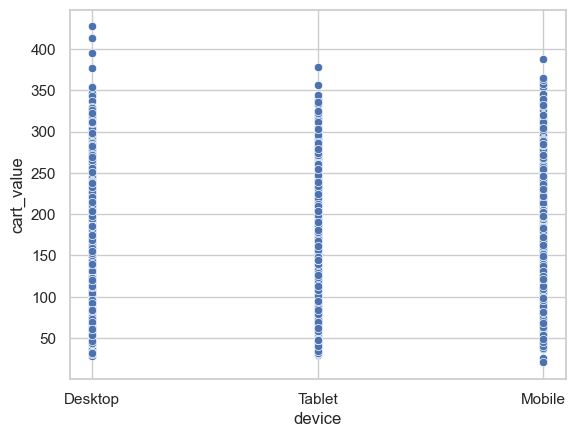

In [131]:
#Now lets look at how our data can be visualized. First checking for any outliers

sns.scatterplot(data=df, x='device', y='cart_value')



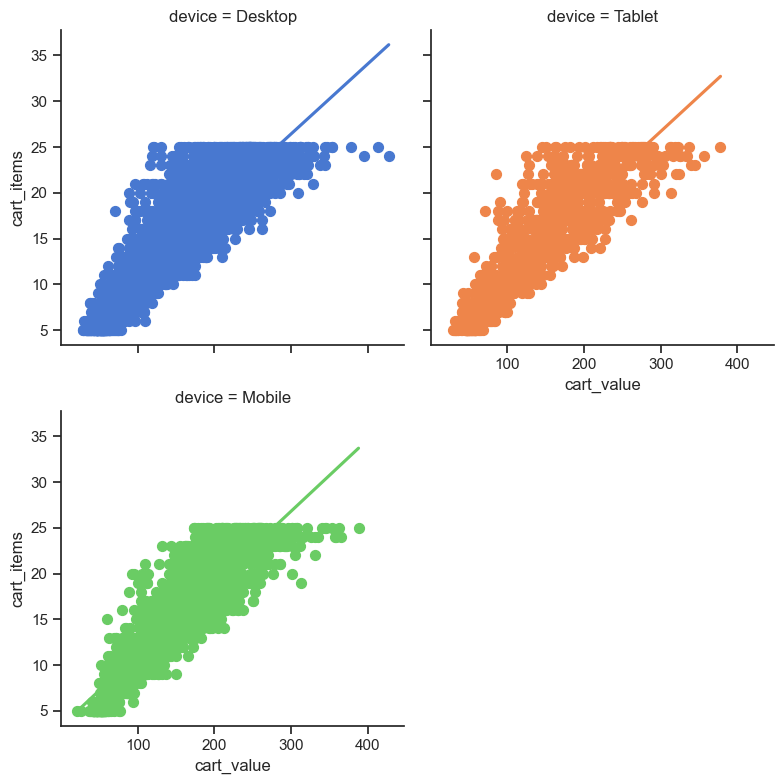

In [132]:
sns.set_theme(style="ticks")


# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="cart_value", y="cart_items", col="device", hue="device",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

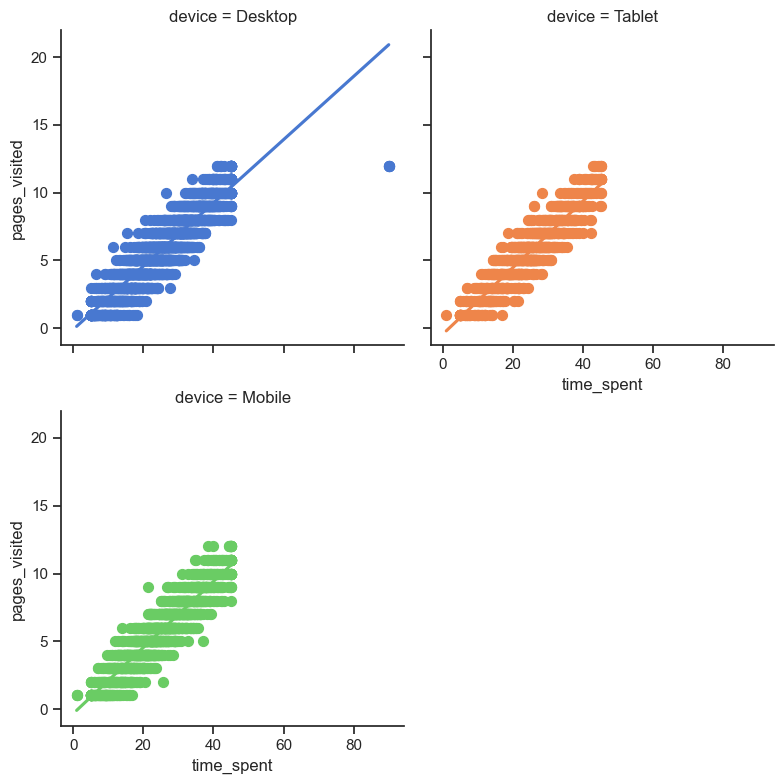

In [133]:
sns.set_theme(style="ticks")


# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="time_spent", y="pages_visited", col="device", hue="device",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

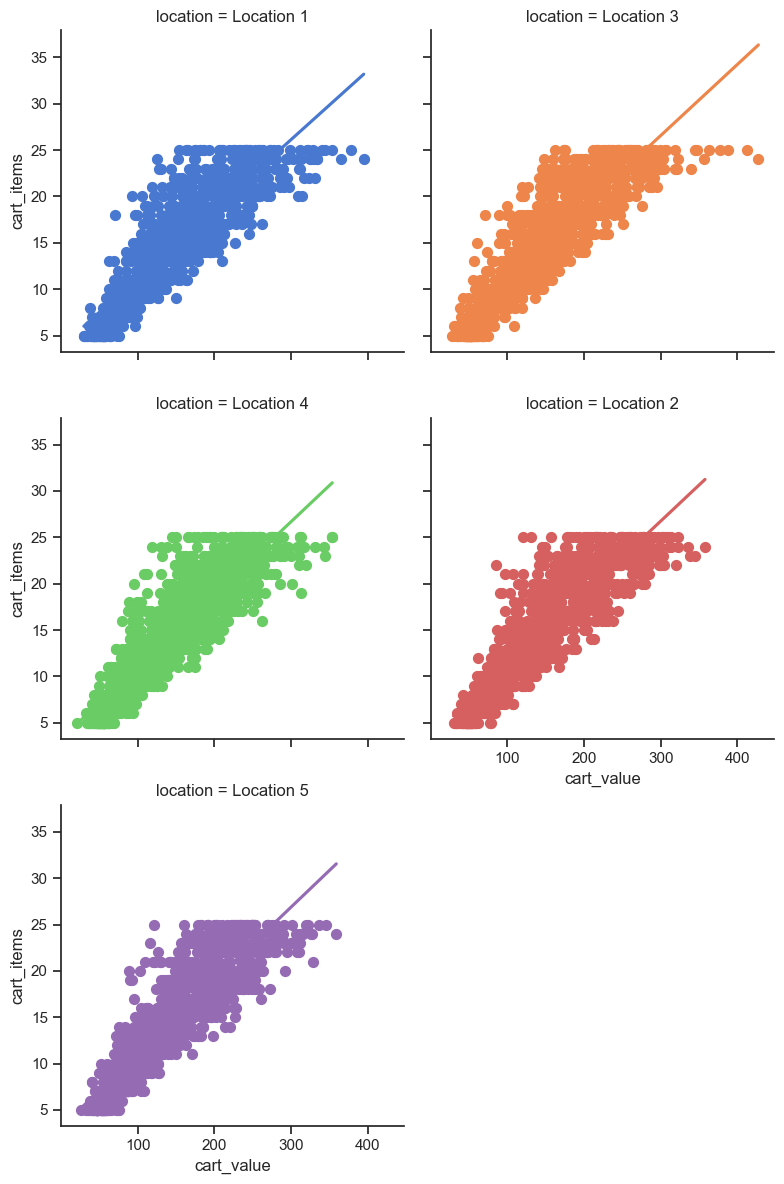

In [134]:
sns.set_theme(style="ticks")


# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="cart_value", y="cart_items", col="location", hue="location",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

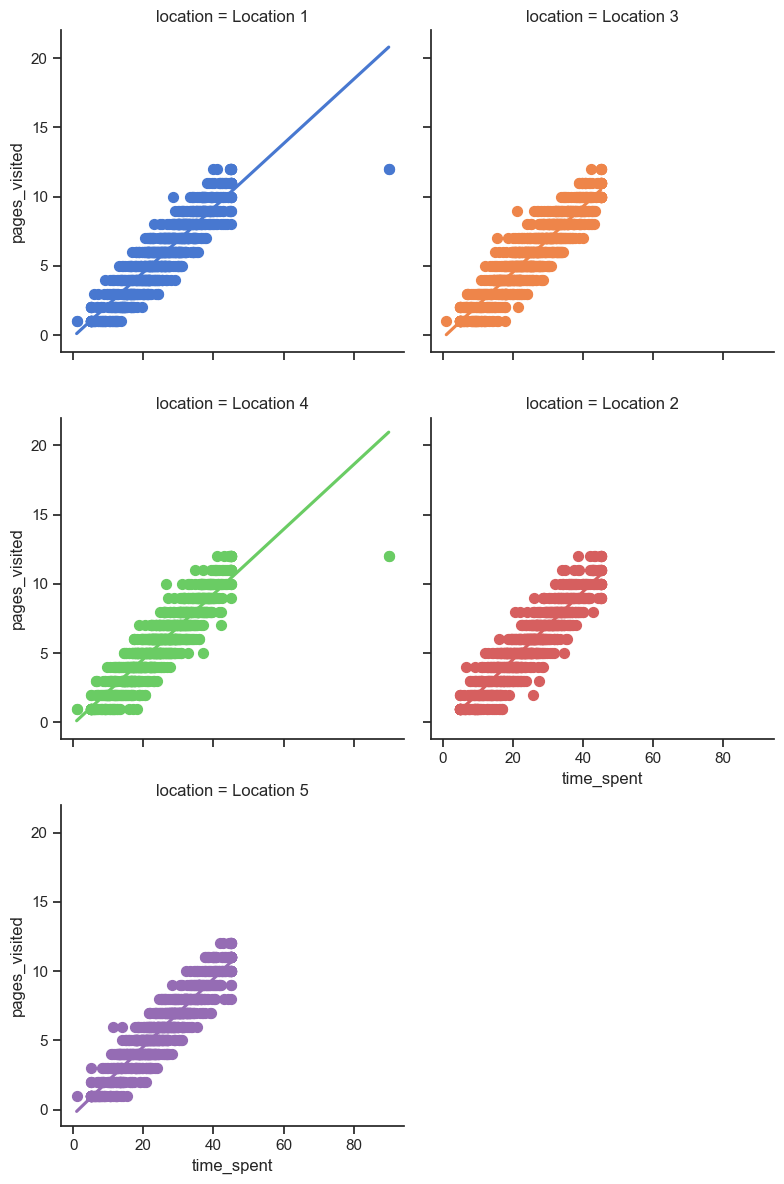

In [135]:
sns.set_theme(style="ticks")


# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="time_spent", y="pages_visited", col="location", hue="location",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [136]:
#Based on the above charts, it looks like there is a definite need to exclude values in time spent exceeding 80. 
#Additionally, there are a few outliers in cart value greater than 400, but they are not that far off from the general distribution
#so choosing not to exclude them

df = df[df['time_spent'] <= 80]
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996,4996
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2582,1060
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,149.439333,0.272618,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,68.724594,0.445351,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,143.290000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,198.380000,1.000000,NaN,NaN


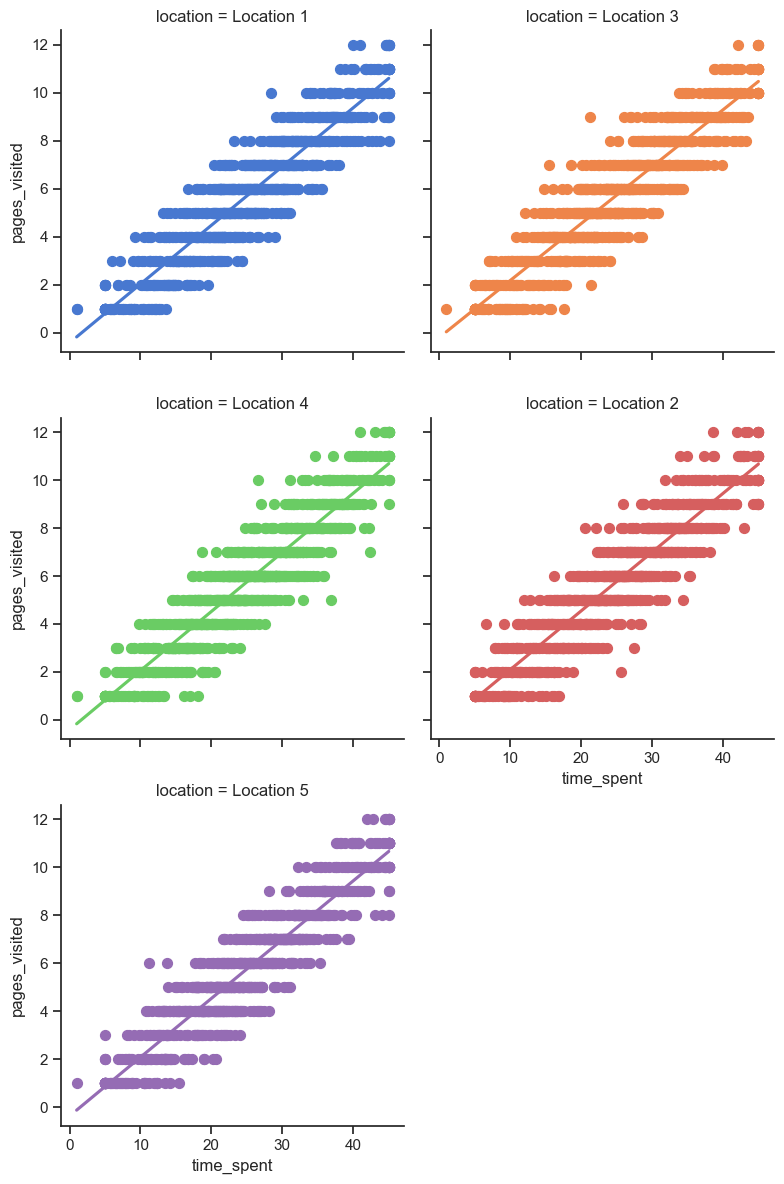

In [137]:
sns.set_theme(style="ticks")


# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="time_spent", y="pages_visited", col="location", hue="location",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

<Axes: xlabel='cart_value', ylabel='Count'>

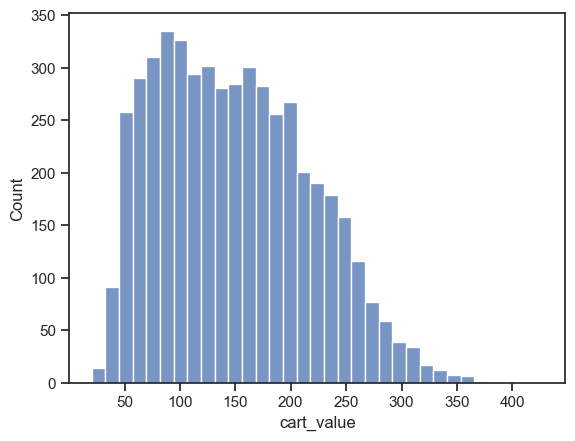

In [138]:
#Let's look to see distribution based on different quantitative fields

sns.histplot(df['cart_value'])


<Axes: xlabel='cart_items', ylabel='Count'>

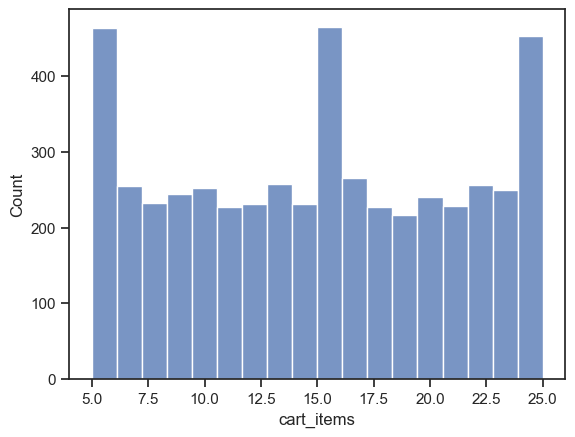

In [139]:
sns.histplot(df['cart_items'])

<Axes: xlabel='sessions', ylabel='Count'>

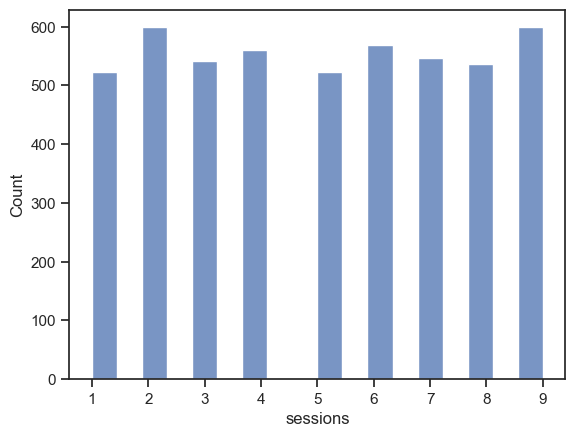

In [140]:
sns.histplot(df['sessions'])

<Axes: xlabel='pages_visited', ylabel='Count'>

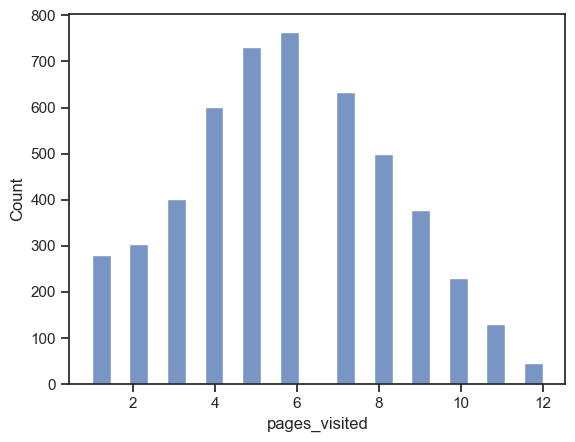

In [141]:
sns.histplot(df['pages_visited'])

<Axes: xlabel='time_spent', ylabel='Count'>

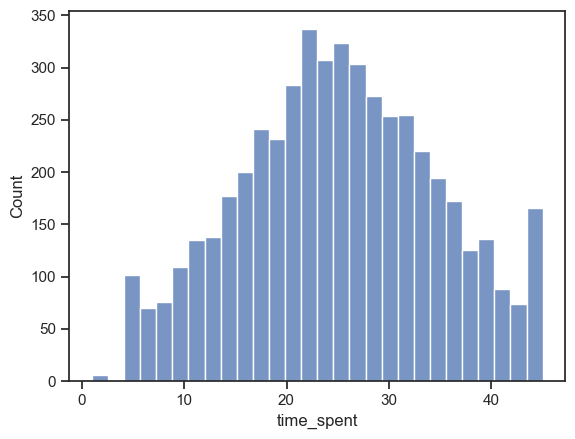

In [142]:
sns.histplot(df['time_spent'])

<Axes: xlabel='location'>

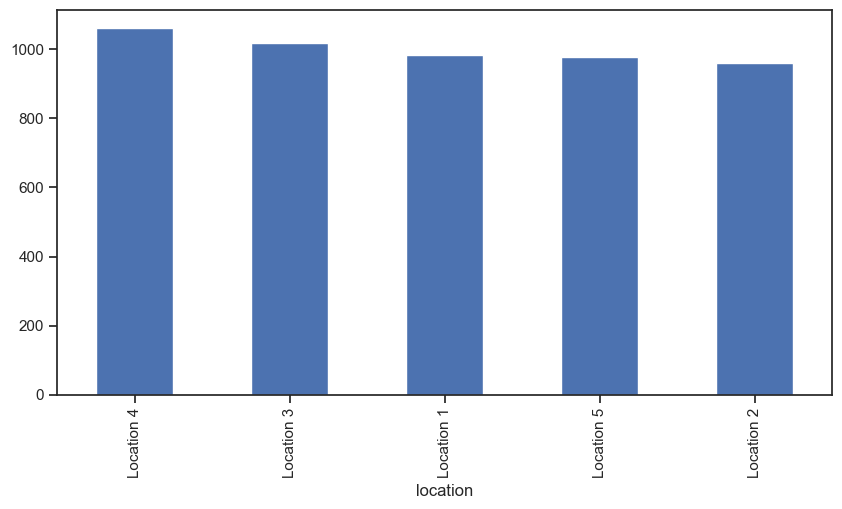

In [143]:
df.groupby('location')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

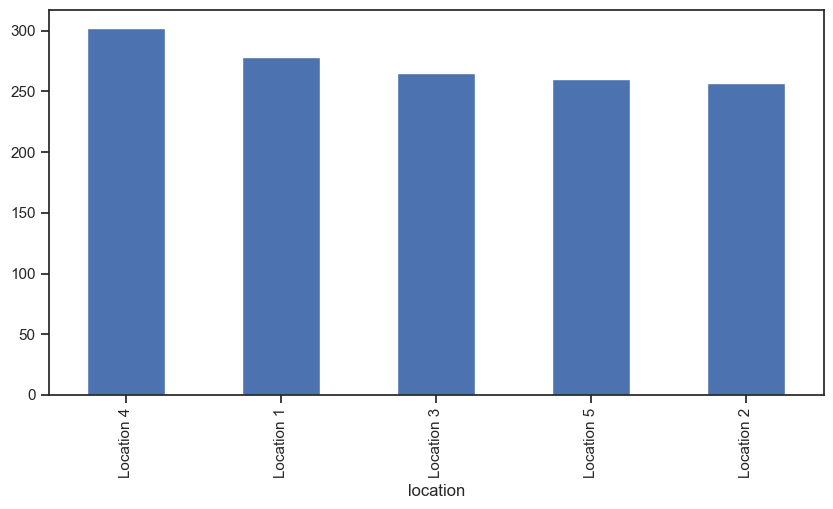

In [144]:
df[df['checkout_status'] == 1].groupby('location')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='location'>

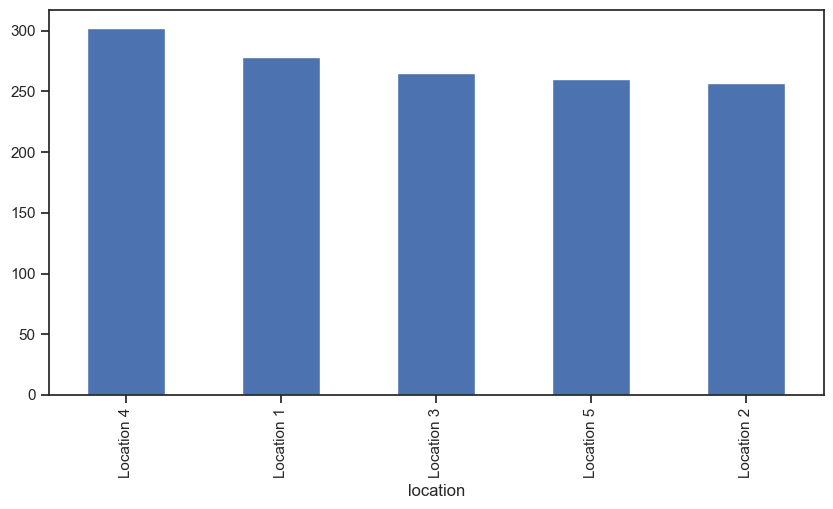

In [145]:
df[df['checkout_status'] == 1].groupby('location')['cart_items'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

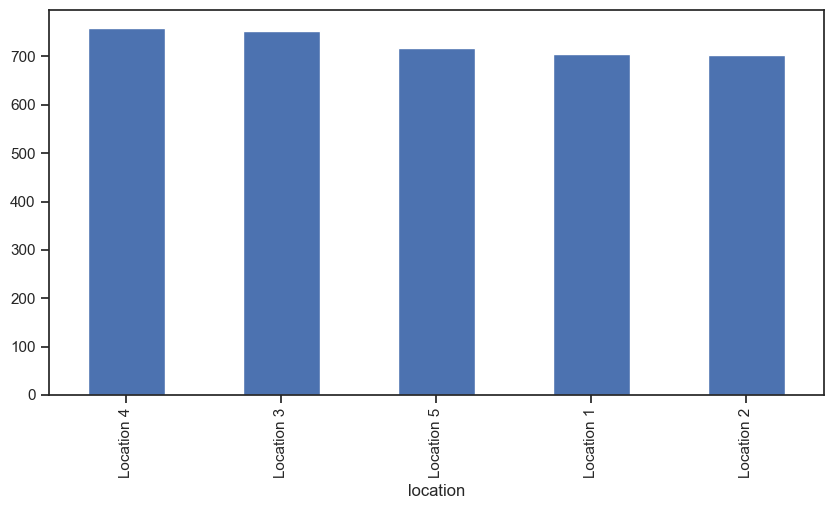

In [146]:
df[df['checkout_status'] == 0].groupby('location')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='location'>

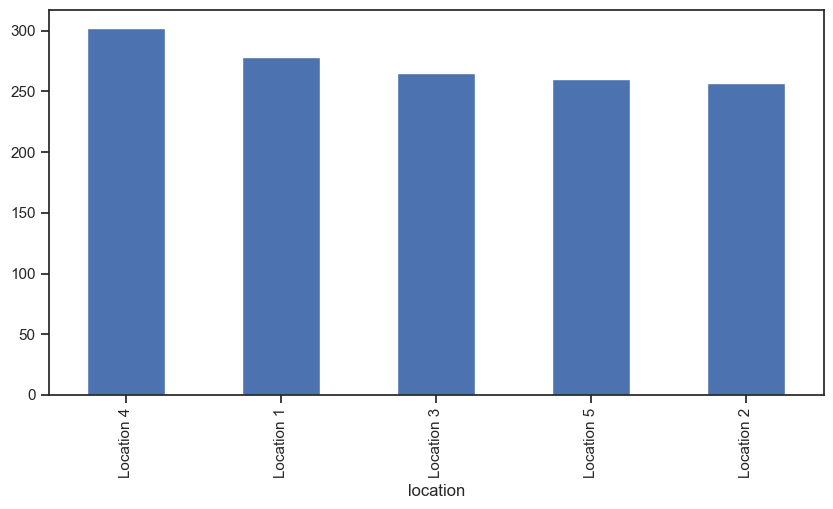

In [147]:
df[df['checkout_status'] == 1].groupby('location')['cart_items'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

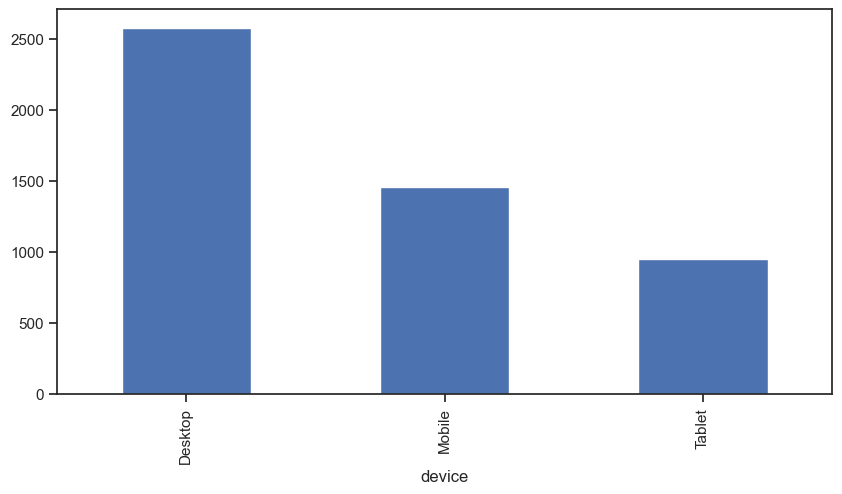

In [148]:
df.groupby('device')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

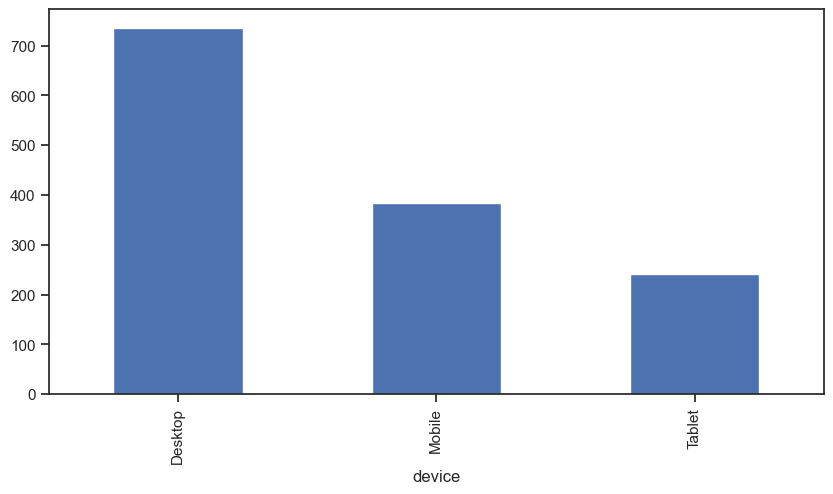

In [149]:
df[df['checkout_status'] == 1].groupby('device')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

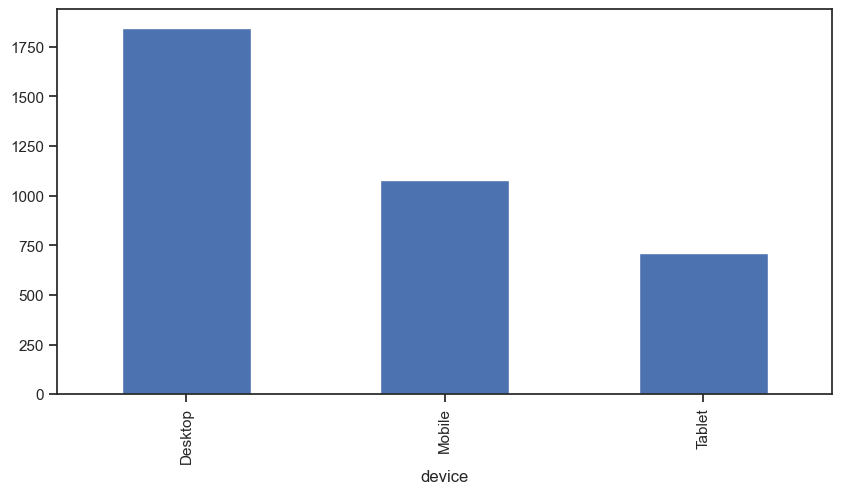

In [150]:
df[df['checkout_status'] == 0].groupby('device')['cart_value'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='cart_value', ylabel='cart_items'>

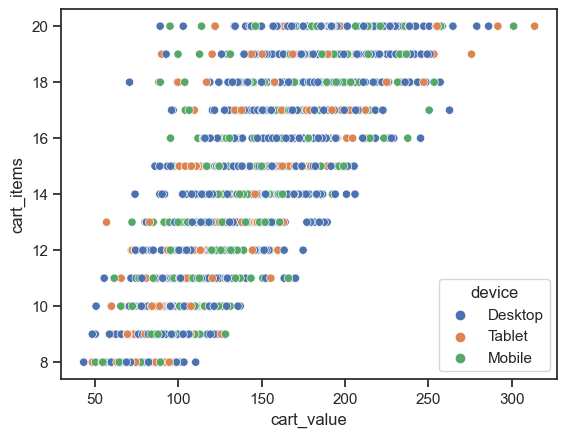

In [151]:
filtered_data = df[df['checkout_status'] == 1]

sns.scatterplot(data=filtered_data, x='cart_value', y='cart_items', hue='device')


<Axes: xlabel='cart_value', ylabel='cart_items'>

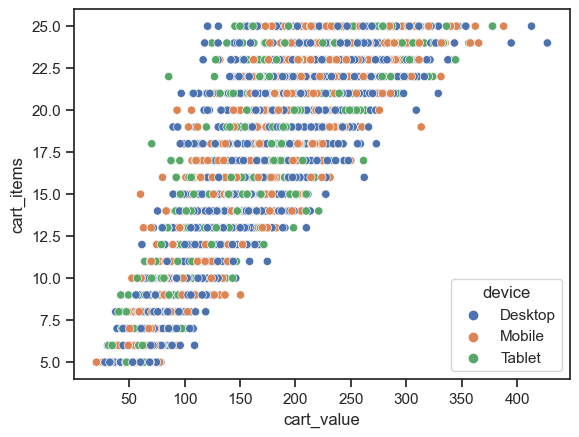

In [152]:
filtered_data = df[df['checkout_status'] == 0]

sns.scatterplot(data=filtered_data, x='cart_value', y='cart_items', hue='device')

<Axes: xlabel='time_spent', ylabel='pages_visited'>

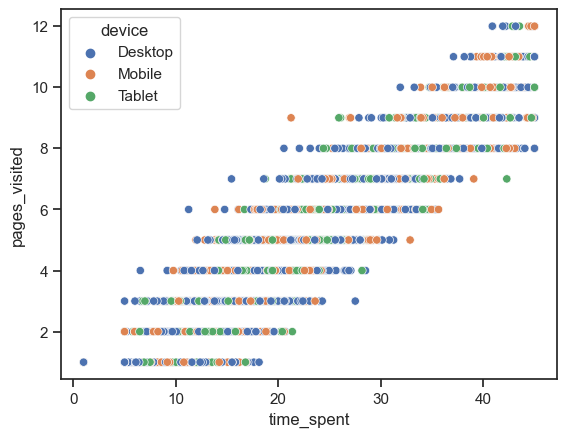

In [153]:
filtered_data = df[df['checkout_status'] == 0]

sns.scatterplot(data=filtered_data, x='time_spent', y='pages_visited', hue='device')

<Axes: xlabel='time_spent', ylabel='pages_visited'>

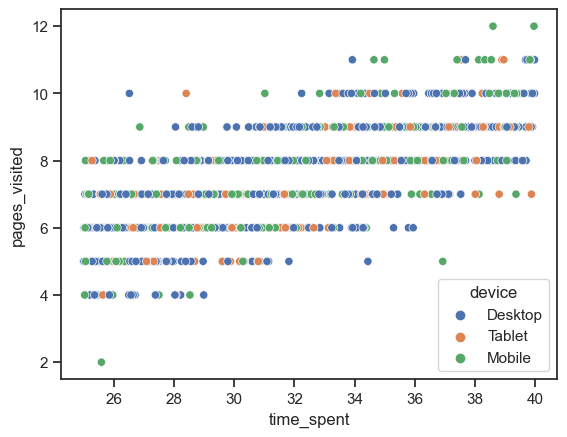

In [154]:
filtered_data = df[df['checkout_status'] == 1]

sns.scatterplot(data=filtered_data, x='time_spent', y='pages_visited', hue='device')

<Axes: xlabel='time_spent', ylabel='sessions'>

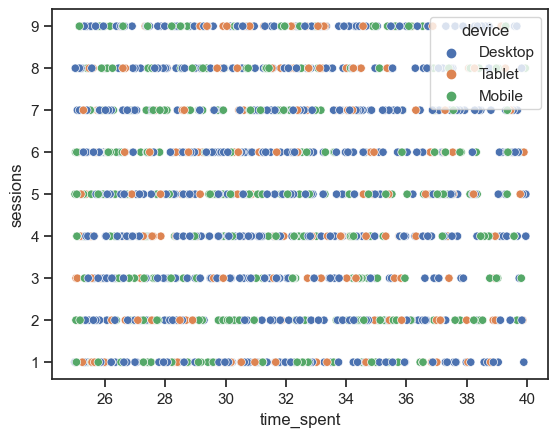

In [155]:
filtered_data = df[df['checkout_status'] == 1]

sns.scatterplot(data=filtered_data, x='time_spent', y='sessions', hue='device')

<Axes: xlabel='time_spent', ylabel='sessions'>

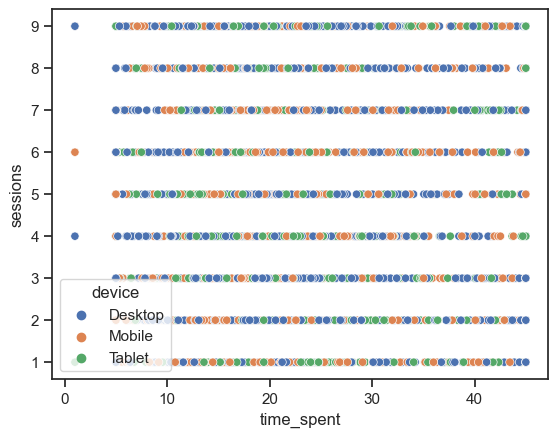

In [156]:
filtered_data = df[df['checkout_status'] == 0]

sns.scatterplot(data=filtered_data, x='time_spent', y='sessions', hue='device')

In [157]:
#Creating another field to signify checout status
df['CheckOutValue'] = df['checkout_status'].map({1: 'Yes', 0: 'No'})
df

C:\Users\16479\AppData\Local\Temp\ipykernel_30452\378024040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CheckOutValue'] = df['checkout_status'].map({1: 'Yes', 0: 'No'})


,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,CheckOutValue
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,No
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,No
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,No
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,Yes
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5,No
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2,No
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4,Yes
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5,No


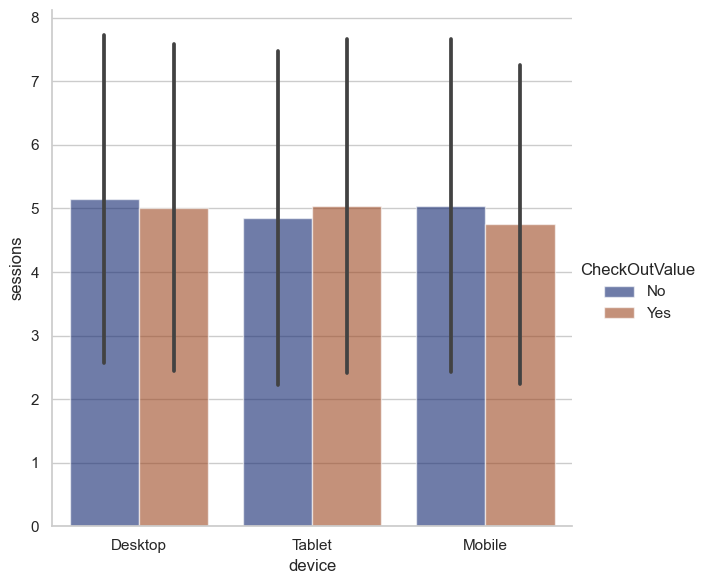

In [158]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="device", y="sessions", hue="CheckOutValue",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

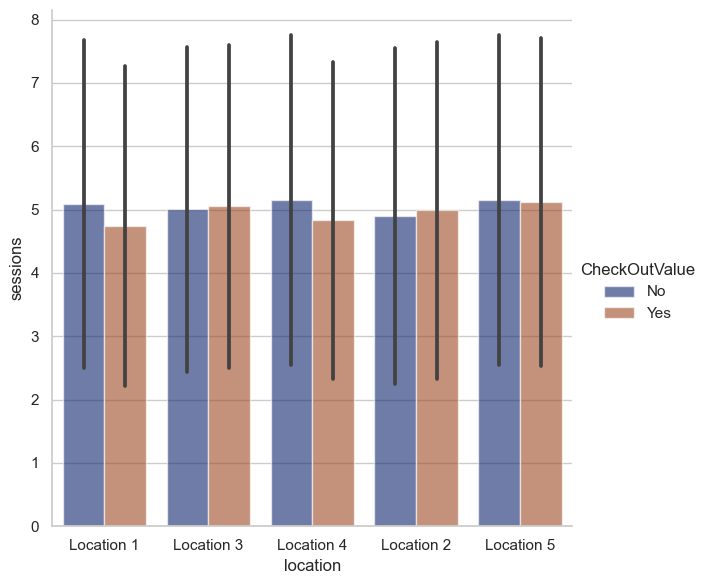

In [159]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="location", y="sessions", hue="CheckOutValue",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

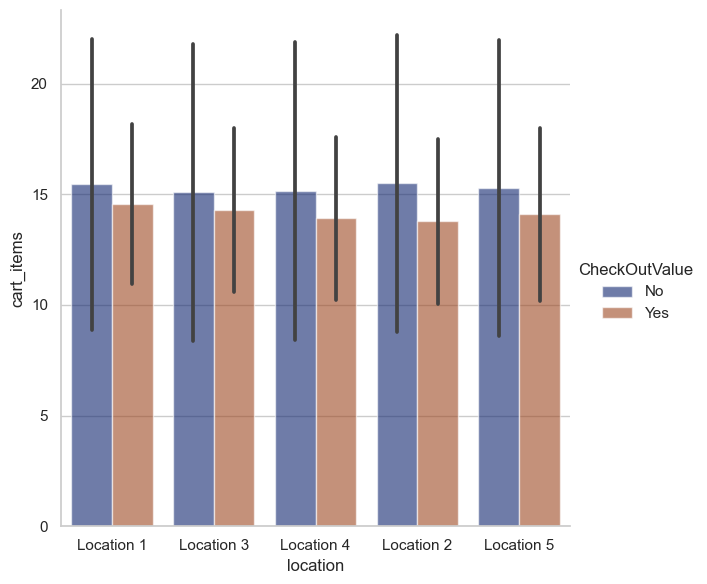

In [160]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="location", y="cart_items", hue="CheckOutValue",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

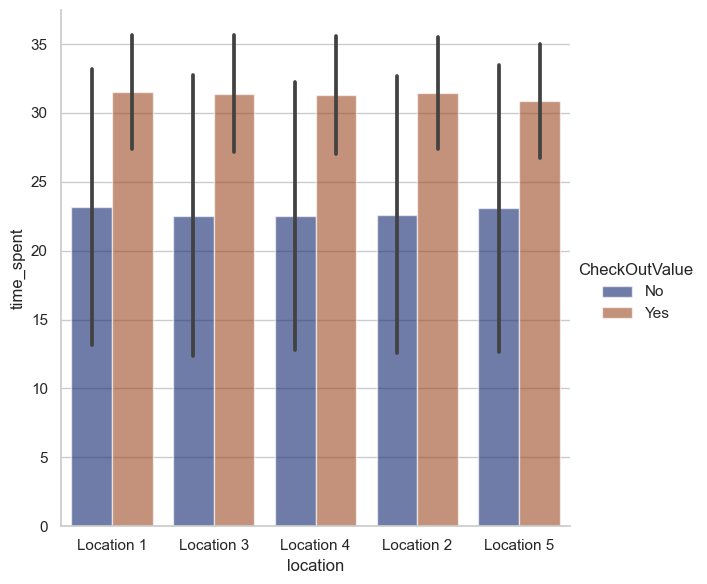

In [174]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="location", y="time_spent", hue="CheckOutValue",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

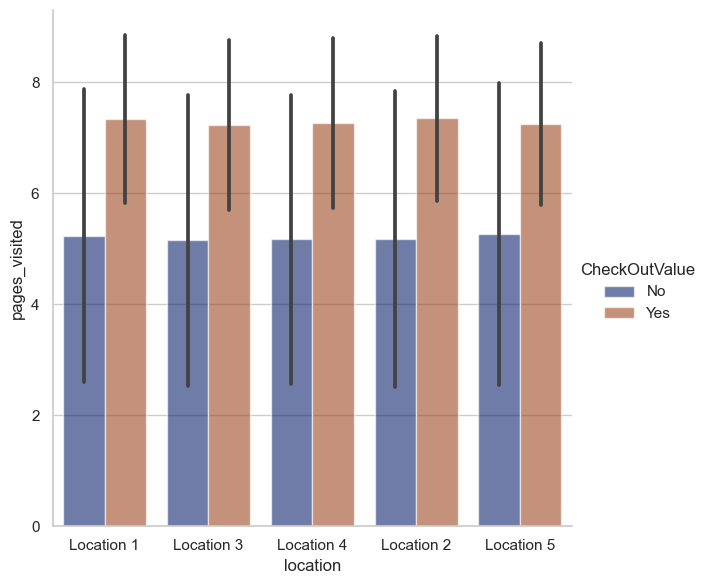

In [175]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="location", y="pages_visited", hue="CheckOutValue",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

In [161]:
location_by_time = df.groupby('location')['time_spent'].aggregate(['sum','mean','median','count'])
location_by_cartvalue = df.groupby('location')['cart_value'].aggregate(['sum','mean','median','count'])
location_by_cartitems = df.groupby('location')['cart_items'].aggregate(['sum','mean','median','count'])
location_by_sessions = df.groupby('location')['sessions'].aggregate(['sum','mean','median','count'])
location_by_pagesvisited = df.groupby('location')['pages_visited'].aggregate(['sum','mean','median','count'])

In [162]:
device_by_time = df.groupby('device')['time_spent'].aggregate(['sum','mean','median','count'])
device_by_cartvalue = df.groupby('device')['cart_value'].aggregate(['sum','mean','median','count'])
device_by_cartitems = df.groupby('device')['cart_items'].aggregate(['sum','mean','median','count'])
device_by_sessions = df.groupby('device')['sessions'].aggregate(['sum','mean','median','count'])
device_by_pagesvisited = df.groupby('device')['pages_visited'].aggregate(['sum','mean','median','count'])

<Axes: xlabel='location'>

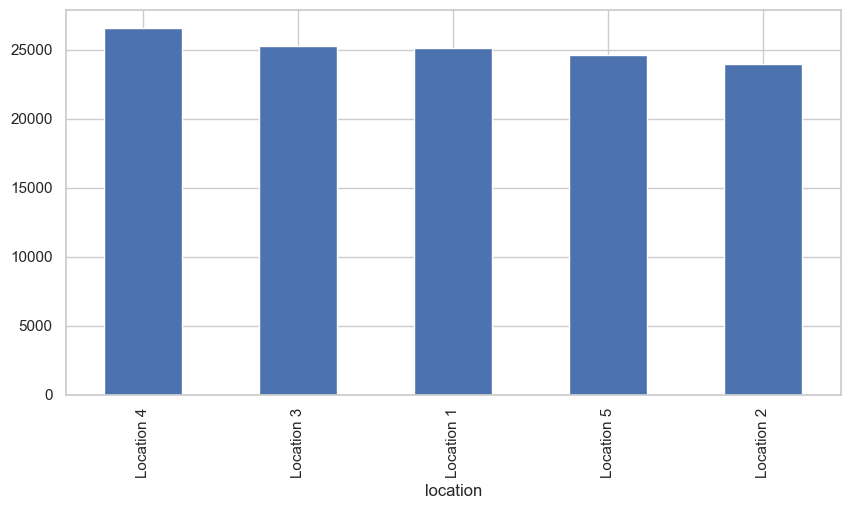

In [163]:
location_by_time['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

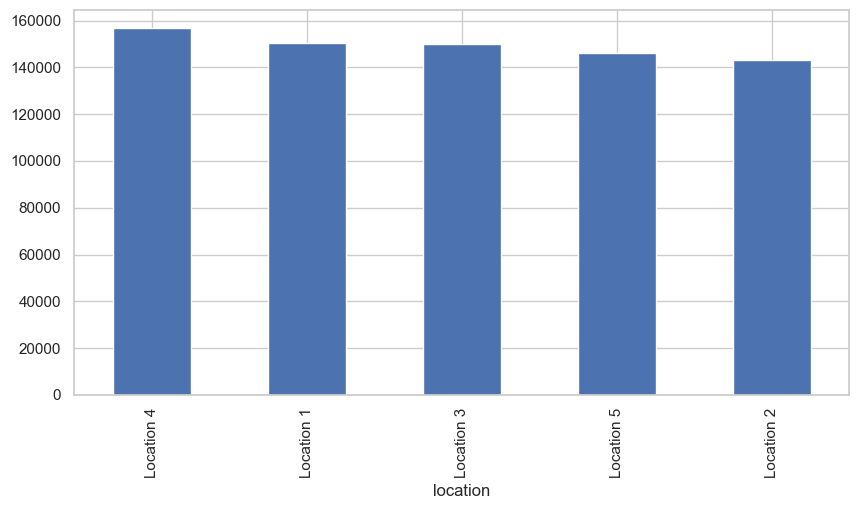

In [164]:
location_by_cartvalue['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

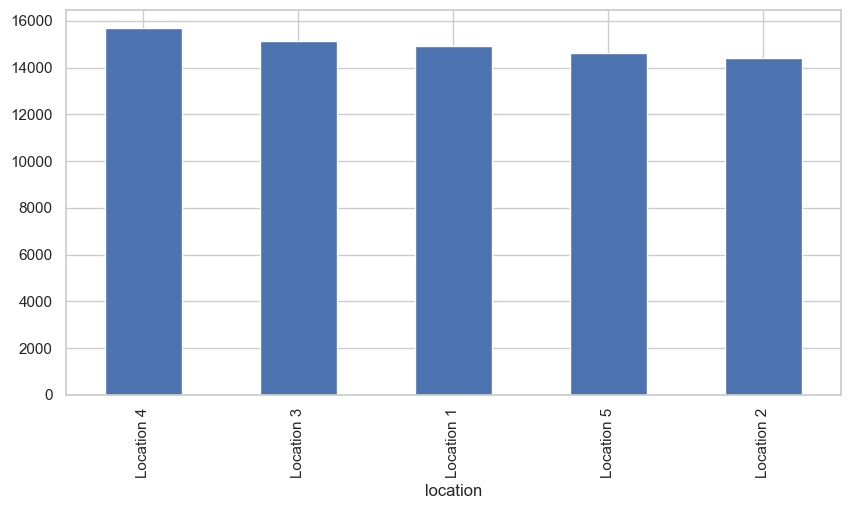

In [165]:
location_by_cartitems['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

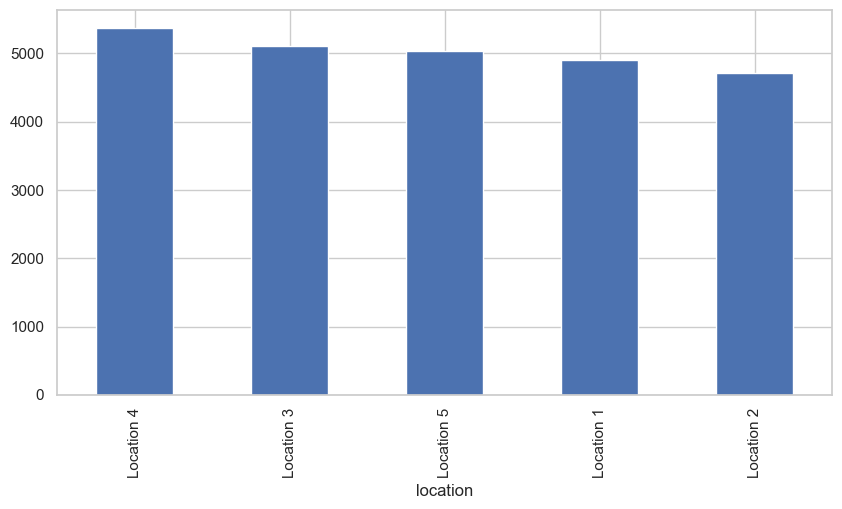

In [166]:
location_by_sessions['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

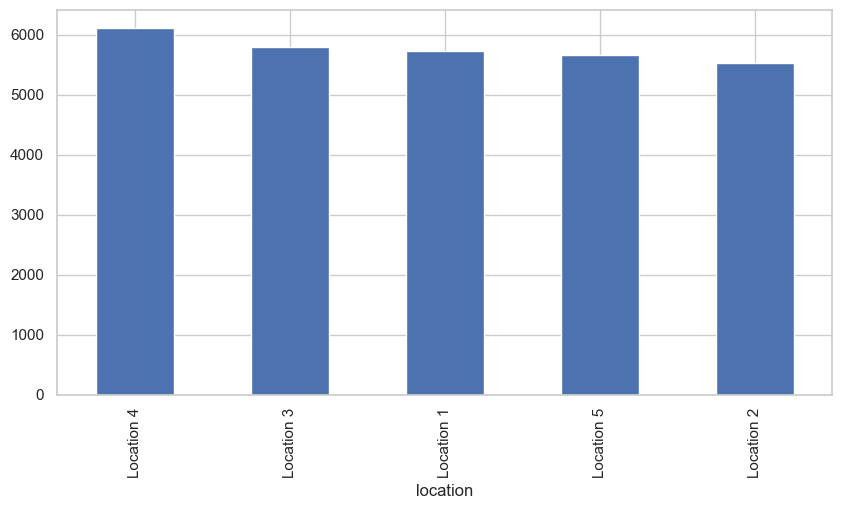

In [167]:
location_by_pagesvisited['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

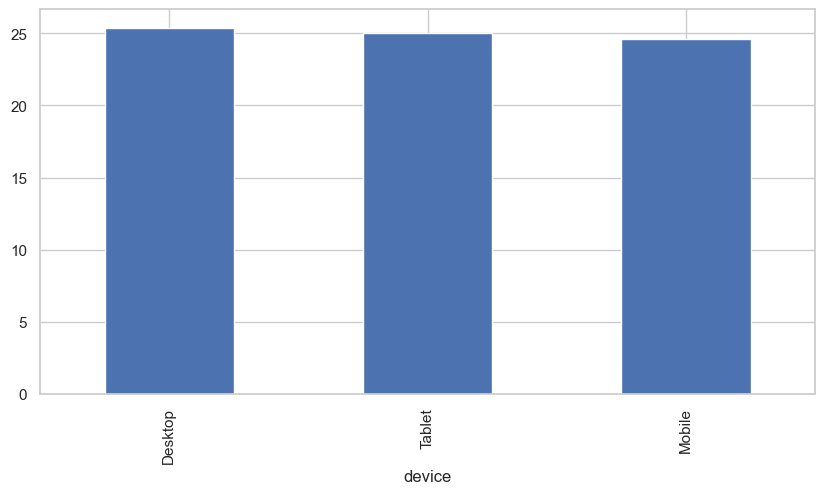

In [168]:
device_by_time['mean'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

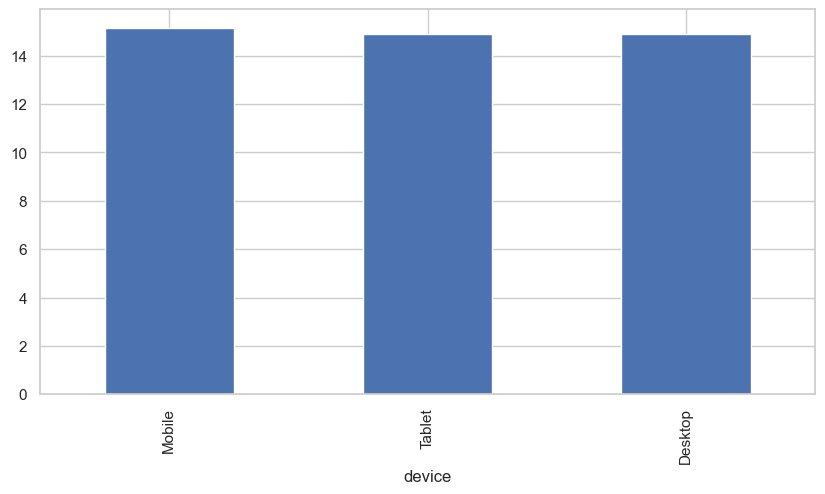

In [169]:
device_by_cartitems['mean'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

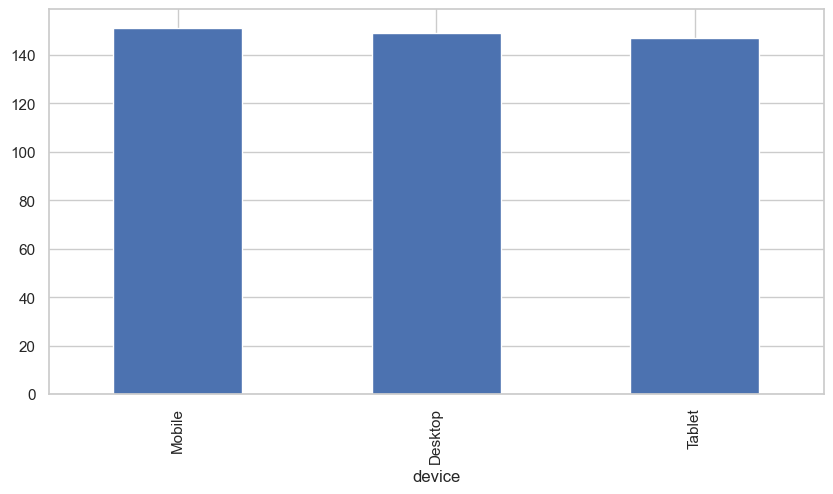

In [170]:
device_by_cartvalue['mean'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

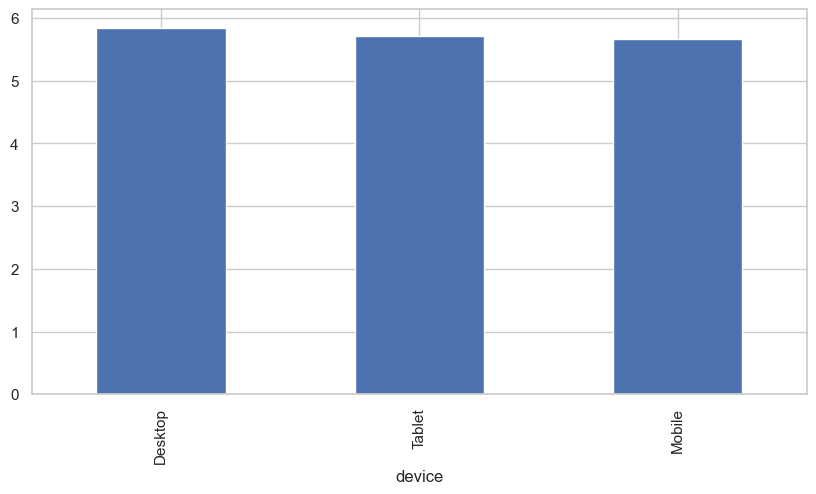

In [171]:
device_by_pagesvisited['mean'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

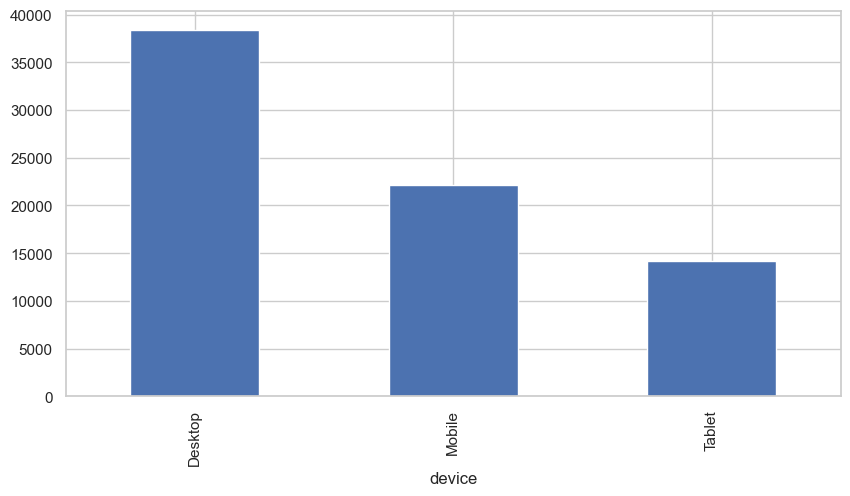

In [172]:
device_by_cartitems['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='device'>

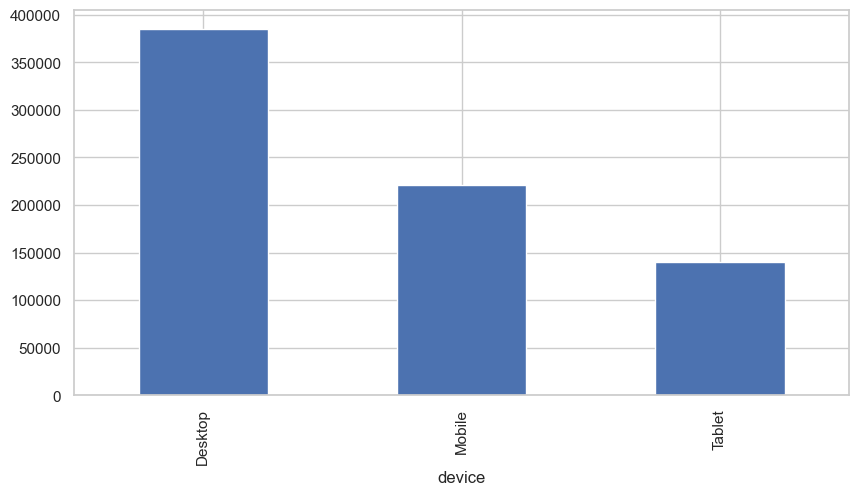

In [173]:
device_by_cartvalue['sum'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

    1. It looks users who do not check out usually have about 1.5x cart value as compared to users who check out, although there is not a significant difference in the number of cart items
    2. Users who check out successfully are spending more on time the pages they visit, even when the number of pages is lower, while users who do not check out seems to spend relatively more time the more pages they visit.
    3. There is no significant difference between the number of session each user opens irrespective of the checkout status


2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.
    1. Based on initial description of the data, null values were observed in Location and Device

    2. For Location, there seems to be an even distribution across all 5 locations, and the count of nulls was very low, so the missing values were replaced using the forward fill function, basically randomizing them

    3. For device, the value of the Null in terms of cart value was considerable, since it was greater than the difference between cart value of Mobile and desktop. So the best idea was to randomly fill the missing 100 values in the ratio of the count of each of the devices (5:3:2 to Device:Mobile:Tablet)

    4. Looking at the visual, there were some outliers observed in cart_value for Desktop, however, the do not seem very far off than the distribution and have been retained

    5. For the field time_spent, outliers were observed having value greater than 80, and thos have been excluded since the count is very low and would not have significant impact on our analysis once removed.

    6. A bit later, a CheckOutValue field was created as a string equivalent of checkout status

    In conclusion, null values were somewhat randomly filled in the column Device and Location, and 4 line items were excluded as part of outliers in time_spent resulting in final record count 4996 with no missing values. An additional column CheckOutValue was created

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

    1. Clearly, there are more number of users using Desktop, and tablet being the lowest. However, there is no significant difference in the average cart value or time spent across all devices. Which means, there could just be less users on tablets; and the mobile usage isnt that high either. People using tablets or mobiles usually prefer to go the app version of a shopping website, it may be prudent to introduce App only discount, which can be sent to all desktop registered users so that they have access to the ecommerce platform on multiple devices.

    2. It looks like location 4 is performing well across all metrics, while Location 2 is not doing too well. The product team can launch a location 2 specific advertisement campaign. The team can send QR codes to download the app or spin the wheel to get benefits like "Free shipping" or "get a low item product free on a minimum purchase" via cold emails.

    3. Since there is a potential, the product team can work in conjunction with the marketing team to introduce "New User" benefits in Location 2 to increase engagement in that location.

    4. To retain engagement in Location 4, the product team can recommend similar items based on past usage, or send them a reminder email about items in their wishlist.

    5. Since it is a beauty and fashion commerce website, target ad campaigns based on gender can be run across all locations. It is also pride month in June, the product team can display more LGBTQ+ friendly products to improve engagement.

    6. Users are spending less time when they are not checking out. The product team should check for factors like screen load rate, and if that is the reason for users to not complete the process. Introducing playability features like rewards can also increase the time spent on each screen.